# 이미지 프로세싱

### 좌표로 ROI 지정하기
- roi : 관심영역 (Region Of Interest, ROI)

#### 관심영역 지정 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/sunset.jpg')

# roi 좌표 지정
x = 320 
y = 150 
w = 50 
h = 50

# roi 지정
roi = img[y:y+h, x:x+w]

print(roi.shape)

(50, 50, 3)


In [ ]:
cv2.rectangle(roi, (0,0),(h-1,w-1), (0,255,0))
cv2.imshow('img',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 예제) copy 함수를 이용해 관심영역 복제 및 새창(roi) 띄우기 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/sunset.jpg')

# roi 좌표 지정
x = 320 
y = 150 
w = 50 
h = 50

# roi 지정
roi = img[y:y+h, x:x+w]
img2 = roi.copy()

img[y:y+h, x+w:x+w+w] = roi

cv2.rectangle(img, (x,y),(x+w+w, y+h), (0,255,0))

print(roi.shape)

# cv2.rectangle(roi2, (0,0),(h-1,w-1), (0,255,0))

# 새로운 좌표에 roi 추가, 태양 ...
# 2개의 태양 영역에 사각형 표시
cv2.imshow('img',img)
# cv2.imshow('roi',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50, 3)


### 마우스로 관심영역 지정 (실습x)

In [1]:
import cv2
import numpy as np

isDragging = False                      # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)         # 색상 값 

def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, img      # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임 ---③
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                  # 드래그 중지
            isDragging = False          
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림ㅇㅣ 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread('img/sunset.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()

x:127, y:58, w:220, h:139
croped.
x:277, y:135, w:179, h:61
croped.
x:218, y:123, w:15, h:149
croped.
x:71, y:52, w:0, h:0
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.


### 마우스 이벤트 코드없이 간단히 ROI 지정
* ret = cv2.selectROI([win_name,] img[, showCrossHair = True, fromCenter=False])
    - win_name : ROI 선택을 진행할 창의 이름, str
    - img : ROI 선택을 진행할 이미지, Numpy ndarray
    - showCrossHair : 선택 영역 중심에 십자 모양 표시 여부
    - fromCenter : 마우스 시작 지점을 영역의 중심으로 지정
    - ret : 선택한 영역 좌표 와 크기(x, y, w, h) 선택을 취소한 경우 모두 0 
        - 'c'키를 누르면 선택 취소

In [ ]:
import cv2
import numpy as np

img = cv2.imread('img/sunset.jpg')

x,y,w,h= cv2.selectROI('img', img, False)

if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi) # ROI지정 영역을 새창으로 표시
    cv2.moveWindow('cropped',0,0) # 새창을 화면 좌측 상단에 이동
    cv2.imwrite('cropped2.jpg',roi) # ROI 영역만 파일로 저장
    
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### ROI 파일 영역 저장하기

### 이미지 스레시홀딩
(1) 바이너리 이미지 : 
    - 검은색과 흰색만으로 표현한 것을 바이너리(binary, 이진화)이미지
    - 원하는 모양을 좀 더 정확하게 판단 할 수 있다.
    - 0 과 1 or 0 과 255를 사용 
    
    
(2) 그레이 스케일이미지
    - 0 ~ 255 사이의 픽셀로 표현
    - 연산의 양을 줄일때 사용
    
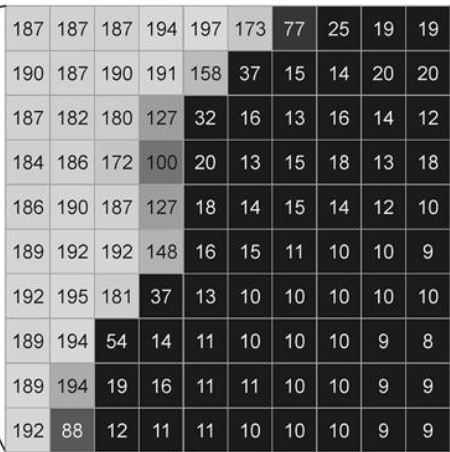
    
                                            값으로 명암을 표현할 수 없고, 점의 밀도로 명암표현

 


#### 스레시홀딩

스레시홀딩(thresholding)이란 경계점을 기준으로 두가지 분류로 나누는 것으로 바이너리 이미지를 만드는 가장 대표적인 방법

* ret, out = cv2.threshold(img, threshold, value, type_flag) 
    * Numpy 배열, 변환할 이미지 
    * threshold : 경계 값 
    * value : 경계 값 기준에 만족하는 픽셀에 적용할 값 
    * type_flag : 스레시홀드 적용 방법 지정 
        * - cv2.THRESH_BINARY : 픽셀 값이 경계 값을 넘으면 value 값을 지정하고 넘지 못하면 0 지정 
        * - cv2.THRESH_BINARY_INV : ‘cv2.THRESH_BINARY ’의 반대 
        * - cv2.THRESH_TRUNC : 픽셀 값이 경계 값을 넘으면 value 값을 지정하고 넘지 못하면 유지
        * - cv2.THRESH_TOZERO : 픽셀 값이 경계값을 넘으면 유지, 아니면 0 
        * - cv2.THRESH_TOZERO_INV : ‘cv2.THRESH_TOZERO’의 반대 
    * ret : 스레시홀딩에 사용한 경계값 
    * out : 결과 바이너리 이미지

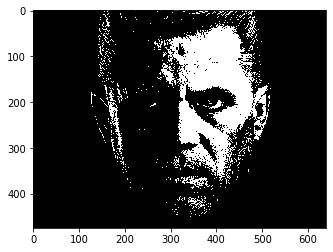

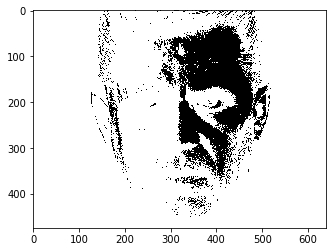

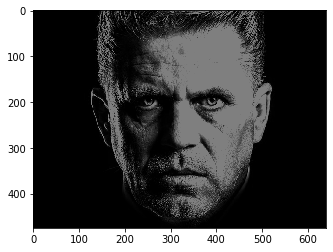

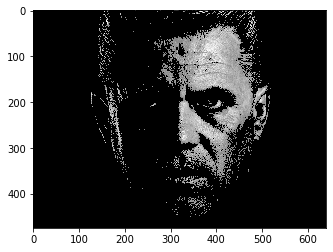

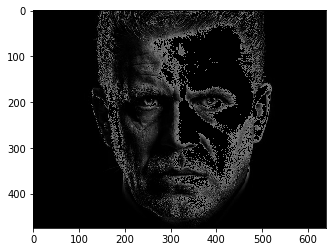

In [18]:
import cv2

img = cv2.imread('img/man_face.jpg', cv2.IMREAD_GRAYSCALE)

imgs = []

ret, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # ret: threshold 경계값
ret, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, t_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs.append(t_bin)
imgs.append(t_bininv)
imgs.append(t_trunc)
imgs.append(t_2zr)
imgs.append(t_2zrinv)

for i in imgs:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()

## 컬러스페이스
#### RGB (row , column , channel) 
#### RGBA (row, column, channel, alpha) : 배경을 투명 처리하기 위함
* img = cv2.imread(file_name [, mode_flag]) : 파일으로부터 이미지 읽기
    - file_name : 이미지경로, 문자열
    - mode_flag = cv2.IMREAD_COLOR : 읽기모드지정
        - cv2.IMREAD_COLOR : 컬러(BGR)스케일로 읽기, 기본 값 => 그대로 읽기
        - cv2.IMREAD_UNCHANGED : 파일 그대로 읽기 => 알파 채널을 가지고 있다면 BGRA로 읽기
            => 알파 채널을 통해 전경과 배경 분리할 수 있어 **마스크 채널**이라고도 부름

default:  (120, 98, 3) , color:  (120, 98, 3) , unchanged:  (120, 98, 4)


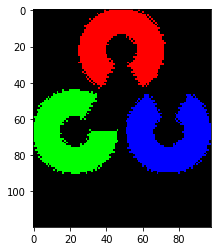

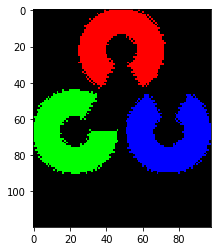

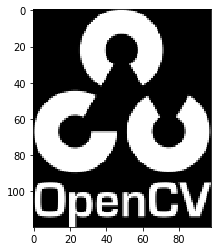

In [11]:
import cv2
import matplotlib.pyplot as plt

#기본값 옵션
img = cv2.imread('img/opencv_logo.png')
#IMREAD_COLOR 옵션
bgr = cv2.imread('img/opencv_logo.png', cv2.IMREAD_COLOR)
#IMREAD_UNCHANGED 옵션
bgra = cv2.imread('img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
#각 옵션에 따른 이미지 shape
print("default: ", img.shape,", color: ",bgr.shape,", unchanged: ",bgra.shape)

plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(bgra, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(bgra[:,:,3], cv2.COLOR_BGR2RGB))
plt.show()


* out = cv2.cvtColor(img, flag)
    - img : Numpy 배열 이미지
    - flag : 변환할 컬러 스페이스(총 274개)
        - cv2.COLOR_BGR2GRAY : BGR컬러를 그레이 스케일로
        - cv2.COLOR_GRAY2BGR : 그레이 스케일 이미지를 BGR 컬러 이미지로 변환
        - cv2.COLOR_BGR2HSV : BGR 컬러 이미지를 HSV 컬러 이미지
        등 (YUV, BGR, HSV간 변경 가능)
    - out : 변환한 결과 이미지 

### HSV ( H : 색조, S : 채도, V : 명도)
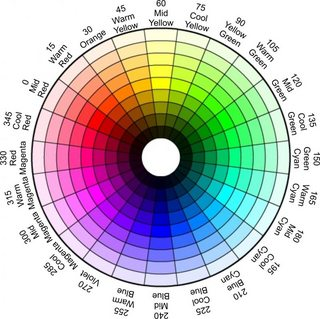

RGB 색상의 범위에 맞는 H값
* 빨강 : 165 ~ 180, 0 ~ 15
* 초록 : 45 ~ 75 
* 파랑 : 90 ~ 120 

S값은 색상의 순수한 정도를 나타내며 255가 가장 순수한 색상

V값은 명도로서 밝은 정도를 나타내며 255가 가장 밝음

**H값 한가지로 색상을 확인 할 수 있어 색상 기반 작업에 효과적**

#### BGR에서 HSV로 변환

In [13]:
import cv2
import numpy as np

#BGR 컬러 스페이스로 원색 픽셀 생성
red_bgr = np.array([[[0,0,255]]],dtype=np.uint8)
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8)
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8)

#BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환
red_hsv = cv2.cvtColor(red_bgr,cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr,cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr,cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr,cv2.COLOR_BGR2HSV)

#HSV를 변환한 픽셀 출력
print('red: ',red_hsv)
print('green: ',green_hsv)
print('blue: ',blue_hsv)
print('yellow: ',yellow_hsv)

red:  [[[  0 255 255]]]
green:  [[[ 60 255 255]]]
blue:  [[[120 255 255]]]
yellow:  [[[ 30 255 255]]]


### 적응형 스레시홀드(P95)
#### * cv2.adaptiveThreshold(img, value, method, type_flag, block_size, C)  
: method에 따라 임계값을 결정 ( 전체픽셀이 하나의 기준이 아니라 영역에 따라 다른 임계값사용) 
    * img : 입력 영상
    * value : 경계 값을 만족하는 픽셀에 적용할 값 
    * method : 경계 값 결정 방법 
        * cv2.ADPTIVE_THRESH_MEAN_C : 이웃 픽셀의 평균으로 설정
        * cv2.ADPTIVE_THRESH_CAUSSIAN_C : 가우시안 분포에 따른 가중치의 합으로 결정 
    * type_flag : 스레시홀드 적용 방법 지정 (cv2.threshold() 함수와 동일) 
    * block_size : 영역으로 나눌 이웃의 크기 (nxn), 홀수(3,5,7,…)
    * C : 계산된 경계 값 결과에서 가감할 상수( 음수가능) 

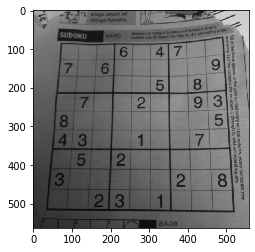

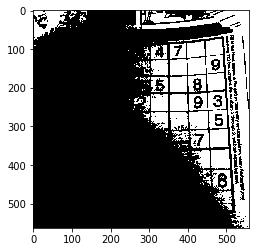

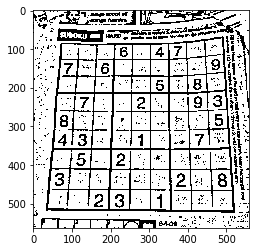

In [19]:
import cv2

image = cv2.imread('img/sudoku.png', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) # ret: threshold 경계값
th2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(th1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB))
plt.show()

#### 오츠(Otsu) 알고리즘(p106)
ret, t_img = cv2.threshold(img, 0, 255, cv.THRESH_BINARY | **cv2.THRESH_OTSU**) 
    - ret : 실행후 결과값 (경계 반환값)

### 이미지연산
* image.shape : 이미지 크기 확인
* image.size : 이미지 픽셀 수 확인
* image[000,000] : 특정 픽셀을 지정합니다

#### 이미지정보 확인

In [4]:
import cv2

image = cv2.imread('img/model3.jpg')

#픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

#이미지 Numpy 객체의 특정 픽셀을 가리킴
px = image[500,100]

#B,G,R 순서로 출력
print(px)

#R값만 출력
print(px[2])

(600, 450, 3)
810000
[228 232 221]
221


#### 픽셀값 바꿔보기(p59)

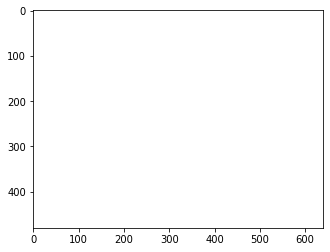

In [5]:
import numpy as np
import matplotlib.pyplot as plt

image = np.full((480, 640, 3), 255, np.uint8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 480 X 640 X 3 넘파이 채널을 만들고 (0, 0, 255) 값

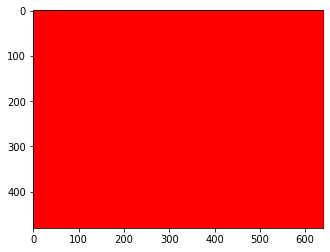

In [6]:
image = np.full((480, 640, 3), (0,0,255), np.uint8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 값을 0으로 채우기 

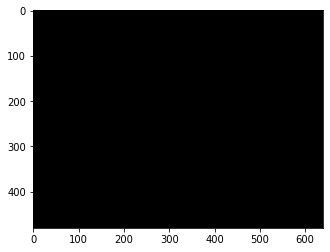

In [9]:
image.fill(0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 특정 픽셀에 접근

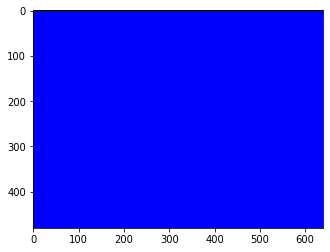

In [8]:
image[240, 160] = image[240,320] = image[240, 480] = (255,255,255)

cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

#### 가로전체, 세로전체에 대한 픽셀에서 0번째 값을 255로 변경

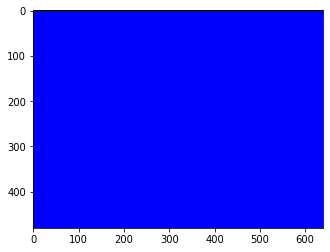

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image[:,:,0] = 255
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 세로선의 픽셀 바꿔보기

#### 특정 영역 내 모든 픽셀, 두 번째 채널을 255로 설정

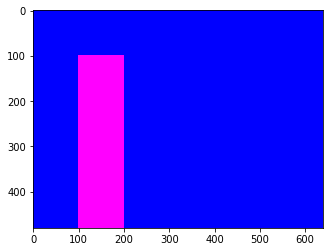

In [12]:
image[100:600, 100:200, 2] = 255
# cv2.imshow('image', image)
# cv2.waitKey()
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 색상다루기

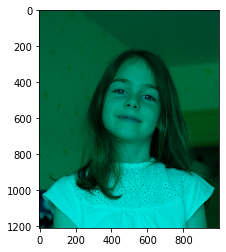

In [21]:
image = cv2.imread('img/image.jpg')
image[:,:,2]=0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 예제) 특정부분에 R픽셀이 사라진 이미지 출력해보기

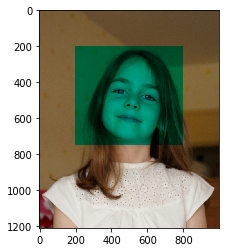

In [23]:
image = cv2.imread('img/image.jpg')
# image[:,:,2]=0
image[200:750, 200:800, 2] = 0
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 사이즈변경 _1
* cv2.resize(image, (width, height), fx, fy, interpolation) : 이미지의 크기를 조절합니다. 
    * (width, height) : Manual Size 
    * fx : 가로 비율
    * fy : 세로 비율 
    * interpolation : 보간법 
        * INTER_CUBIC : 사이즈를 크게 할 때 주로 사용합니다. 
        * INTER_AREA : 사이즈를 작게 할 때 주로 사용합니다. 



* 보간법 : 사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미
    * 작은이미지를 큰이미지를 바꾸면 새로운 픽셀은 특정분포를 따르거나, 픽셀사이의 사이값

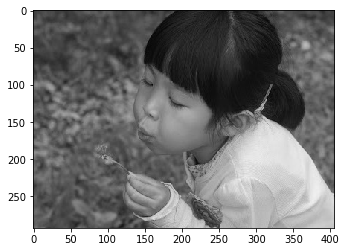

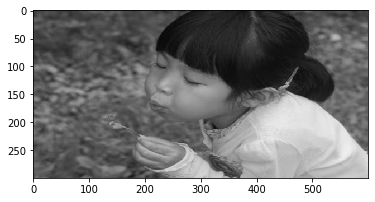

In [24]:
import cv2

img = cv2.imread('img/girl.jpg')
im2 = cv2.resize(img, (600,300))

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 사이즈변경 _ 2

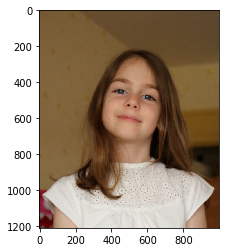

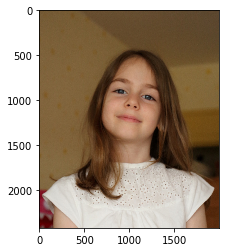

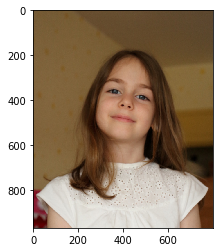

In [28]:
import cv2

img = cv2.imread('img/image.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

#2.0배
expand = cv2.resize(img,None, fx=2.0, fy=2.0,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand,cv2.COLOR_BGR2RGB))
plt.show()

#0.8배
shrink = cv2.resize(img,None, fx=0.8, fy=0.8,interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink,cv2.COLOR_BGR2RGB))
plt.show()

### 이미지자르기
* *[y1:y2, x1:x2]

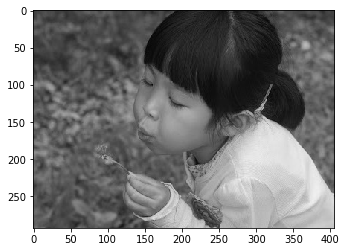

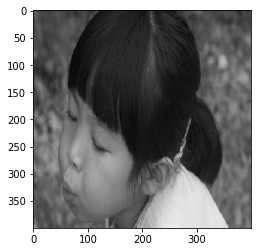

In [31]:
img = cv2.imread('img/girl.jpg')
im2 = img[0:200,100:500]
im2 = cv2.resize(im2,(400,400))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 합치기
* dest = cv2.add(src1, src2[, dest, mask, dtype]): src1과 src2 더하기 
    - src1 : 입력 영상(이미지) 1 또는 수 
    - src2 : 입력 영상(이미지) 2 또는 수
    - dest : 출력 영상
    - mask : 0이 아닌 픽셀만 연산
    - dtype : 출력 dtype 
    
* add 함수는 더하기 연산 시 255를 넘는 경우 거뭇거리거나, 하얗게 날아간 것 처럼 보인다.

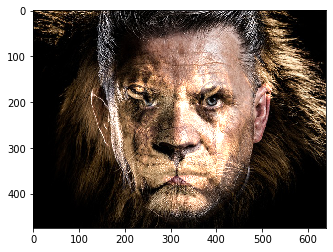

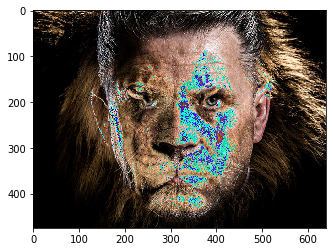

In [34]:
img1 = cv2.imread('img/man_face.jpg')
img2 = cv2.imread('img/lion_face.jpg')

result = cv2.add(img1,img2)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()

result = img1+img2
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()

#### 알파블렌딩 (가중치를 조절하여 픽셀의 합이 255를 넘지 않게 한다.)
* cv2.addWeight(img1, alpha, img2, beta, gamma)
    - img1, img2 : 합성할 두 영상
    - alpha : img1에 지정할 가중치 
    - beta : img2에 지정할 가중치 (주로 1-alpha)
    - gamma : 연산 결과에 가감할 상수 (주로 0)

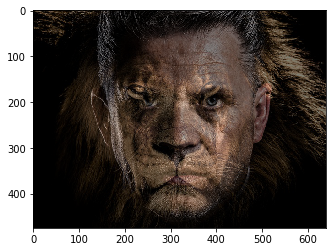

In [35]:
alpha = 0.5

img1 = cv2.imread('img/man_face.jpg')
img2 = cv2.imread('img/lion_face.jpg')

dst = cv2.addWeighted(img1, alpha, img2, (1-alpha),0)

plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

#### 알파블렌딩, 트랙바 적용하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

win_name='Alpha blending'
trackbar_name = 'fade'

def onChange(x):
    alpha =x/100
    dst = cv2.addWeighted(img1,1-alpha,img2,alpha,0)
    cv2.imshow(win_name,dst)
    
img1 = cv2.imread('img/man_face.jpg')
img2 = cv2.imread('img/lion_face.jpg')

cv2.imshow(win_name,img1)
cv2.createTrackbar(trackbar_name,win_name,0,100,onChange)

cv2.waitKey()
cv2.destroyAllWindows()


### 비트와이즈 연산
* bitwise_and(img1, img2, mask = None) : 각 픽셀에 대해 비트와이즈 AND 연산
* bitwise_or (img1, img2, mask = None) : 각 픽셀에 대해 비트와이즈 OR 연산
* bitwise_xor(img1, img2, mask  None) : 각 픽셀에 대해 비트와이즈 XOR 연산
* bitwise_not(img1, img2, mask  None) : 각 픽셀에 대해 비트와이즈 NOT 연산
    - img1, img2 : 연산 대상 영상, 동일한 shape
    - mask : 0이 아닌 픽셀만 연산, 바이너리 이미지 

#### bitwise_and 연산으로 마스킹하기

#### 이미지 합성과 마스킹

#### Open CV함수 이용해서 간편하게 합성하기 
* dst = cv2.seamlessClone(src, dst, mask, coords, flags[, output])
    - src : 입력영상, 일반적으로 전경
    - dst : 대상 영상, 일반적으로 배경
    - mask : 마스크, src에서 합성하고자 하는 영역은 255, 나머지는 0 
    - coodrs : src가 놓여지기 원하는 dst의 좌표(중앙)
    - flasgs: 합성 방식

### 예제) 해골, 남자 반반 합성